# WEB SCRAPING ASSIGNMENT 2

External Resource Used for Chrome Browser: [https://chromedriver.chromium.org/downloads](https://chromedriver.chromium.org/downloads)

In [1]:
#Importing Libraries
import pandas as pd
from selenium import webdriver
import time

#### Q1: Write a python program to scrape data for “Data Analyst” Job position in “Bangalore” location. You have to scrape the job-title, job-location, company_name, experience_required. You have to scrape first 10 jobs data.

**This task will be done in following steps:**
1. first get the webpage [https://www.naukri.com/](https://www.naukri.com/)
2. Enter “Data Analyst” in “Skill,Designations,Companies” field and enter “Bangalore” in “enter the location” field.
3. Then click the search button.
4. Then scrape the data for the first 10 jobs results you get.
5. Finally create a dataframe of the scraped data.

*Note- All of the above steps have to be done in code. No step is to be done manually*

In [2]:
#Initializing webdriver with chromedriver using with keyword so that after execution driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver: 

    #Loading the url https://www.naukri.com/ using driver
    url = 'https://www.naukri.com/'
    driver.get(url)
    
    #storing original window_handle
    original_handle = driver.current_window_handle
    
    #closing all other windows or pop-up windows
    for handle in driver.window_handles:
        if handle != original_handle:
            driver.switch_to.window(handle)
            driver.close()            
    
    #Switch back to original window
    driver.switch_to.window(original_handle)
    
    #Wating for 5 seconds to load page
    time.sleep(5)
    
    #Initializing page fields
    skills_designations_companies = driver.find_element_by_xpath("//input[@id='qsb-keyword-sugg']")
    enter_locations = driver.find_element_by_xpath("//input[@id='qsb-location-sugg']")
    search_button = driver.find_element_by_xpath("//div[@class='search-btn']/button")

    #Setting values into fields
    skills_designations_companies.send_keys('Data Analyst')
    enter_locations.send_keys('Bangalore')
    search_button.click()
    
    #Wating for 5 seconds to load page
    time.sleep(5)
    
    #Scraping data for the first 10 jobs results.
    job_containers = driver.find_elements_by_xpath("//article[@class='jobTuple bgWhite br4 mb-8']")[:10]

    titles = []
    locations = []
    companies = []
    experiences = []
    for job in job_containers:
        title = job.find_element_by_class_name("title").text
        location = job.find_element_by_class_name('location').text
        company = job.find_element_by_class_name("subTitle").text
        experience = job.find_element_by_class_name("experience").text

        #Appending data into list
        titles.append(title)
        locations.append(location)
        companies.append(company)
        experiences.append(experience)

    #Storing job details into dictionery
    job_details = {
        "Job Title": titles,
        "Location": locations,
        "Company": companies,
        "Experience Required": experiences
    }

    #Creating Dataframe for job details
    df_jobs = pd.DataFrame(job_details)

#Interpreting Scraped Jobs
df_jobs

,Job Title,Location,Company,Experience Required
0,Data Engineer/Data Analyst- Chennai,"Hyderabad/Secunderabad, Pune, Chennai, Bangalo...",Inflexion Analytix Private Limited,0-2 Yrs
1,Azure Data Analyst,Bangalore/Bengaluru,Capgemini Technology Services India Limited,6-8 Yrs
2,Data Analyst,Bangalore/Bengaluru,"RedLock, Inc",0-0 Yrs
3,Data Analyst,Bangalore/Bengaluru(Devalapur),Super India Tech Mark,0-2 Yrs
4,Data Analyst,Bangalore/Bengaluru,tech mahindra ltd,4-8 Yrs
5,Data Analyst,Bangalore/Bengaluru,CONDUENT BUSINESS SERVICES INDIA LLP,1-2 Yrs
6,Data Analyst,Bangalore/Bengaluru,GlaxoSmithKline Pharmaceuticals Limited,2-7 Yrs
7,"Data Analyst - Alteryx, Tableau and SQL",Bangalore/Bengaluru,Schneider Electric,2-5 Yrs
8,Data Analyst,Bangalore/Bengaluru,Myntra Designs Pvt. Ltd.,3-6 Yrs
9,Data Analyst,Bangalore/Bengaluru,Myntra Designs Pvt. Ltd.,4-8 Yrs


#### Q2: Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location. You have to scrape the job-title, job-location, company_name, full job-description. You have to scrape first 10 jobs data.

**This task will be done in following steps:**
1. first get the webpage [https://www.naukri.com/](https://www.naukri.com/)
2. Enter “Data Scientist” in “Skill,Designations,Companies” field and enter “Bangalore” in “enter the location” field.
3. Then click the search button.
4. Then scrape the data for the first 10 jobs results you get.
5. Finally create a dataframe of the scraped data.

*Note- 1. All of the above steps have to be done in code. No step is to be done manually.*

In [3]:
#Intializing webdriver with chromedriver using with keyword so that after complete execution, driver closes automatically
with webdriver.Chrome('chromedriver.exe') as driver:
    
    #Initializing driver with url https://www.naukri.com
    url = 'https://www.naukri.com'
    driver.get(url)
    
    #Storing current or original window id/handle
    original_window = driver.current_window_handle
    
    #Closing all pop-up windows using driver window handle
    for handle in driver.window_handles:
        if handle != original_window:
            driver.switch_to.window(handle)
            driver.close()
    
    #Switching driver to original window
    driver.switch_to.window(original_window)
    
    #Initializing required page fields
    skills_designations_companies = driver.find_element_by_xpath("//input[@id='qsb-keyword-sugg']")
    enter_locations = driver.find_element_by_xpath("//input[@id='qsb-location-sugg']")
    search_button = driver.find_element_by_xpath("//div[@class='search-btn']/button")
    
    #Setting values to page fields
    skills_designations_companies.send_keys('Data Scientist')
    enter_locations.send_keys('Bangalore')
    search_button.click()
    
    #Waiting for 5 seconds to load page
    time.sleep(5)
    
    #Scraping first 10 job search results
    job_containers = driver.find_elements_by_xpath("//article[@class='jobTuple bgWhite br4 mb-8']")[:10]
    
    #Scraping data from each of job
    titles = []
    locations = []
    companies = []
    descriptions = []
    for job in job_containers:
        title = job.find_element_by_class_name('title').text
        location = job.find_element_by_class_name("location").text
        company = job.find_element_by_class_name('subTitle').text
        
        #For job description, we need to visit the link associated with job title and scrape the description from there.
        job.find_element_by_class_name('title').click()
        
        #Waiting for 3 seconds to load page
        time.sleep(3)
        
        #Getting the window handle of current opened link
        temp_window = driver.window_handles[-1]
        driver.switch_to.window(temp_window)
        
        #Scraping full description from opened link
        description = driver.find_element_by_class_name("job-desc").text
        
        #Closing opened handle link and switch back to original window
        driver.close()
        driver.switch_to.window(original_window)
                        
        #Adding each record into list
        titles.append(title)
        locations.append(location)
        companies.append(company)
        descriptions.append(description)
        
    #Storing job details into dictionery
    job_details = {
        "Job Title": titles,
        "Location": locations,
        "Company": companies,
        "Description": descriptions
    }
    
#Interpreting scraped job details
df_jobs = pd.DataFrame(job_details)
df_jobs

,Job Title,Location,Company,Description
0,Data Scientist - Python/ SQL,Bangalore/Bengaluru,Catalyst,Job description\nRoles and responsibilities \n...
1,Data Scientist - Python/sql,Bangalore/Bengaluru,Catalyst,Job description\nJob description\n\nSkill: SQL...
2,Data Scientist - Python/r,Bangalore/Bengaluru,Catalyst,Job description\nWhat You'll Do :\n\n- Leverag...
3,Data Scientist - Machine Learning,Bangalore/Bengaluru,Catalyst,Job description\nRoles and Responsibilities\n-...
4,Data Scientist - Machine Learning,Bangalore/Bengaluru,AugmatrixGo,Job description\nRoles and Responsibilities\n\...
5,Data Scientist - KPO,Bangalore/Bengaluru,Antrors HR Solutions,Job description\nResponsibilities:\n\n- Work w...
6,Data Scientist - Machine Learning/Python,Bangalore/Bengaluru,Change leaders,Job description\nEducation requirement : PhD i...
7,Data Scientist,Bangalore/Bengaluru,Vanguard Human Resource Consultant Pvt Ltd,Job description\nStrong in Experience in Data ...
8,Data Scientist,Bangalore/Bengaluru,Narayana Health,Job description\nRoles and Responsibilities\nI...
9,Data Scientist,Bangalore/Bengaluru,Narayana Health,Job description\nRoles and Responsibilities\nI...


#### Q3: In this question you have to scrape data using the filters available on the webpage as shown below:
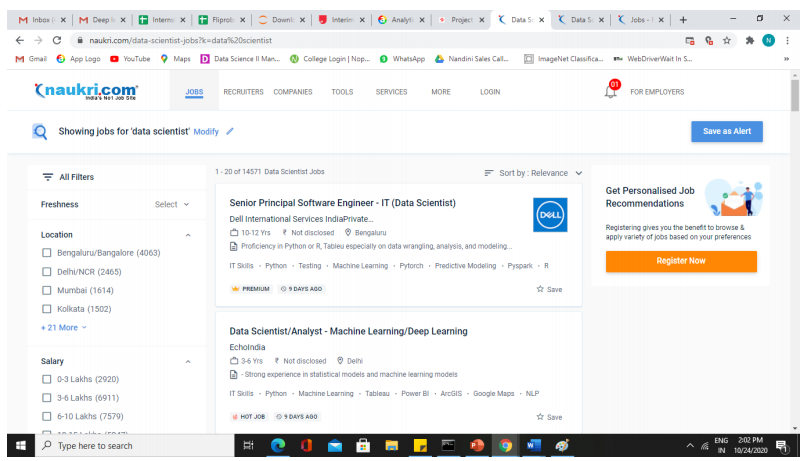
- You have to use the location and salary filter.
- You have to scrape data for **“Data Scientist”** designation for first 10 job results.
- You have to scrape the **job-title, job-location, company_name, experience_required.**
- The location filter to be used is **“Delhi/NCR”**
- The salary filter to be used is **“3-6” lakhs**

**The task will be done as shown in the below steps:**
1. first get the webpage [https://www.naukri.com/](https://www.naukri.com/)
2. Enter “Data Scientist” in “Skill,Designations,Companies” field.
3. Then click the search button.
4. Then apply the location filter and salary filter by checking the respective boxes
4. Then scrape the data for the first 10 jobs results you get.
5. Finally create a dataframe of the scraped data.

*Note- All of the above steps have to be done in code. No step is to be done manually.*

In [4]:
#Intializing webdriver with chromedriver using with keyword so that after complete execution, driver closes automatically
with webdriver.Chrome('chromedriver.exe') as driver:
    
    #Initializing driver with url https://www.naukri.com
    url = 'https://www.naukri.com'
    driver.get(url)
    
    #Storing current or original window id/handle
    original_window = driver.current_window_handle
    
    #Closing all pop-up windows using driver window handle
    for handle in driver.window_handles:
        if handle != original_window:
            driver.switch_to.window(handle)
            driver.close()
    
    #Switching driver to original window
    driver.switch_to.window(original_window)
    
    #Initializing required page fields
    skills_designations_companies = driver.find_element_by_xpath("//input[@id='qsb-keyword-sugg']")
    search_button = driver.find_element_by_xpath("//div[@class='search-btn']/button")
    
    #Setting values to page fields
    skills_designations_companies.send_keys('Data Scientist')
    search_button.click()
    
    #Waiting for 3 seconds to load page
    time.sleep(3)
    
    #Applying location filter
    driver.find_element_by_xpath(".//*[contains(text(), 'Delhi / NCR')]").click()
    
    #Waiting for 3 seconds to load page
    time.sleep(3)
    
    #Applying salary filter
    driver.find_element_by_xpath(".//*[contains(text(), '3-6 Lakhs')]").click()
    
    #Waiting for 3 seconds to load page
    time.sleep(3)
    
    #Scraping first 10 job search results
    job_containers = driver.find_elements_by_xpath("//article[@class='jobTuple bgWhite br4 mb-8']")[:10]
    
    #Scraping data from each of job
    titles = []
    locations = []
    companies = []
    experiences = []
    for job in job_containers:
        title = job.find_element_by_class_name("title").text
        location = job.find_element_by_class_name('location').text
        company = job.find_element_by_class_name("subTitle").text
        experience = job.find_element_by_class_name("experience").text

        #Appending data into list
        titles.append(title)
        locations.append(location)
        companies.append(company)
        experiences.append(experience)

    #Storing job details into dictionery
    job_details = {
        "Job Title": titles,
        "Location": locations,
        "Company": companies,
        "Experience Required": experiences
    }
    
#Interpreting scraped job details
df_jobs = pd.DataFrame(job_details)
df_jobs

,Job Title,Location,Company,Experience Required
0,Data Scientist - IBM Garage,"Noida, Hyderabad/Secunderabad, Bangalore/Benga...",IBM India Pvt. Limited,5-8 Yrs
1,Data Scientist/Data Analyst - Python/Machine L...,"Mumbai, Ghaziabad",Change leaders,5-10 Yrs
2,Females Required- Data Scientist- Noida,"Noida, Gurgaon/Gurugram, Delhi / NCR",Randstad,3-7 Yrs
3,Data Scientist - Python & Machine Learning,"Hyderabad/Secunderabad, Pune, Bangalore/Bengal...",FUTURES AND CAREERS,2-7 Yrs
4,Data Scientist - Python & Machine Learning,"Hyderabad/Secunderabad, Pune, Chennai, Bangalo...",FUTURES AND CAREERS,2-7 Yrs
5,Data Scientist - Hadoop/BigQuery,Noida,Jubna,3-6 Yrs
6,Data Scientist - Python / Machine Learning / T...,"Mumbai, Hyderabad/Secunderabad, Bangalore/Beng...",FUTURES AND CAREERS,3-8 Yrs
7,Data Scientist - Python & Machine Learning,"Hyderabad/Secunderabad, Bangalore/Bengaluru, D...",FUTURES AND CAREERS,2-7 Yrs
8,Required- Data Scientist (NLP)-Axis Bank - 6 m...,"Kolkata, New Delhi, Hyderabad/Secunderabad, Pu...",Axis Bank Limited,4-9 Yrs
9,Data Scientist - Python / Machine Learning / T...,"Hyderabad/Secunderabad, Bangalore/Bengaluru, D...",FUTURES AND CAREERS,3-8 Yrs


#### Q4: Write a python program to scrape data for first 10 job results for Data scientist Designation in Noida location. You have to scrape company_name, No. of days ago when job was posted, Rating of the company.

**This task will be done in following steps:**

1. first get the webpage https://www.glassdoor.co.in/index.htm
2. Enter “Data Scientist” in “Job Title,Keyword,Company” field and enter “Noida” in “location” field.
3. Then click the search button. You will land up in the below page:
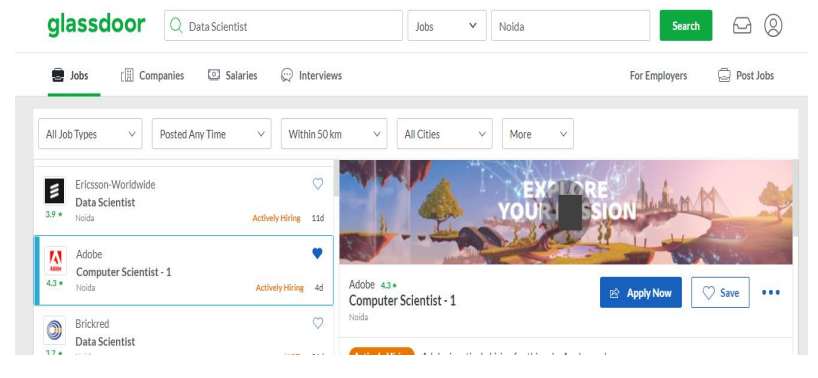
4. Then scrape the data for the first 10 jobs results you get in the above shown page.
5. Finally create a dataframe of the scraped data.

*Note- All of the above steps have to be done in code. No step is to be done manually.*

In [5]:
#Intializing webdriver with chromedriver using with keyword so that after complete execution, driver closes automatically
with webdriver.Chrome('chromedriver.exe') as driver:
    #Initializing driver with page url https://www.glassdoor.co.in/Job/index.htm
    url = 'https://www.glassdoor.co.in/Job/index.htm'
    driver.get(url)
    
    #Initializing required page fields
    search_keyword = driver.find_element_by_xpath("//input[@id='KeywordSearch']")
    search_in_location = driver.find_element_by_xpath("//input[@id='LocationSearch']")
    search_button = driver.find_element_by_xpath("//button[@id='HeroSearchButton']")
    
    #Setting field values
    search_keyword.send_keys('Data Scientist')
    search_in_location.clear()
    search_in_location.send_keys('Noida')
    search_button.click()
    time.sleep(3)
    
    #Scraping first 10 job search results
    job_containers = driver.find_elements_by_xpath("//li[@class='react-job-listing css-wp148e eigr9kq3']")[:10]
    
    #Scraping job details
    companies = []
    number_of_days = []
    company_ratings = []
    for job in job_containers:
        companies.append(job.find_element_by_class_name("e1n63ojh0").text)
        number_of_days.append(job.find_element_by_class_name("css-mi55ob").text)
        company_ratings.append(job.find_element_by_xpath("//div[@class='d-flex flex-column css-x75kgh e1rrn5ka3']/span").text)
        
    job_details = {
        "Company Name": companies,
        "Number Of Days Posted Ago": number_of_days,
        "Company Rating": company_ratings
    }

#Interpreting job details using dataframe
df_jobs = pd.DataFrame(job_details)
df_jobs

,Company Name,Number Of Days Posted Ago,Company Rating
0,BlackRock,19d,4.3
1,Adobe,7d,4.3
2,Priority Vendor,24h,4.3
3,Healtheoz India,24h,4.3
4,Gauge Data Solutions,24h,4.3
5,abc consultants,1d,4.3
6,SearchUrCollege,24h,4.3
7,Techlive,6d,4.3
8,Biz2Credit Inc,9d,4.3
9,Srijan Technologies Pvt Ltd,5d,4.3


#### Q5: Write a python program to scrape the salary data for Data Scientist designation in Noida location. You have to scrape Company name, Number of salaries, Average salary, Min salary, Max Salary.

**The above task will be, done as shown in the below steps:**

1. first get the webpage https://www.glassdoor.co.in/Salaries/index.htm
2. Enter “Data Scientist” in Job title field and “Noida” in location field.
3. Click the search button.
4. After that you will land on the below page.
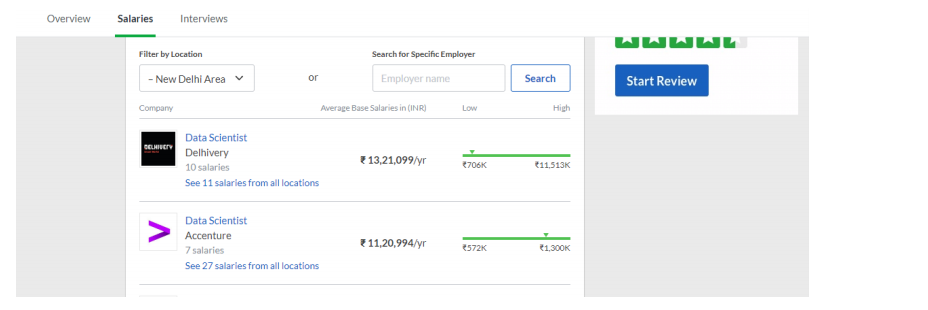
You have to scrape whole data from this webpage
5. Scrape data for first 10 companies. Scrape the min salary, max salary, company name, Average salary and rating of the company.
6. Store the data in a dataframe.

*Note that all of the above steps have to be done by coding only and not manually.*

In [6]:
#Intializing webdriver with chromedriver using with keyword so that after complete execution, driver closes automatically
with webdriver.Chrome('chromedriver.exe') as driver:
    #Initializing driver with page url https://www.glassdoor.co.in/Salaries/index.htm
    url = 'https://www.glassdoor.co.in/Salaries/index.htm'
    driver.get(url)
    
    #Initializing required page fields
    search_keyword = driver.find_element_by_xpath("//input[@id='KeywordSearch']")
    search_in_location = driver.find_element_by_xpath("//input[@id='LocationSearch']")
    search_button = driver.find_element_by_xpath("//button[@id='HeroSearchButton']")
    
    #Setting field values
    search_keyword.send_keys('Data Scientist')
    search_in_location.clear()
    search_in_location.send_keys('Noida')
    search_button.click()
    time.sleep(3)
    
    #Scraping first 10 search results
    job_containers = driver.find_elements_by_xpath("//div[@data-test='salary-list-items']")[:10]
    
    #Scraping required details
    companies = []
    number_of_salaries = []
    average_salaries = []
    minimum_salaries = []
    maximum_salaries = []
    
    for job in job_containers:
        companies.append(job.find_elements_by_tag_name("p")[1].text)
        number_of_salaries.append(job.find_element_by_class_name('css-1uyte9r').text)
        average_salaries.append(job.find_element_by_xpath("div/div/strong").text)
        salary = job.find_element_by_class_name("common__RangeBarStyle__values")
        
        minimum_salaries.append(salary.find_elements_by_tag_name("span")[0].text)
        maximum_salaries.append(salary.find_elements_by_tag_name("span")[1].text)
        

In [7]:
#Interpreting scarped salary data
df_job_salaries = pd.DataFrame({
    "Company Name": companies,
    "Number of Salaries": number_of_salaries,
    "Average Salary": average_salaries,
    "Minimum Salary": minimum_salaries,
    "Maximum Salary": maximum_salaries
})

df_job_salaries

,Company Name,Number of Salaries,Average Salary,Minimum Salary,Maximum Salary
0,Tata Consultancy Services,14 salaries,"₹ 5,97,967",₹333K,"₹1,080K"
1,Accenture,14 salaries,"₹ 11,12,243",₹560K,"₹2,147K"
2,Delhivery,14 salaries,"₹ 12,12,741",₹436K,"₹11,274K"
3,IBM,13 salaries,"₹ 7,37,972",₹569K,"₹2,648K"
4,Ericsson-Worldwide,12 salaries,"₹ 7,15,984",₹350K,"₹1,565K"
5,UnitedHealth Group,10 salaries,"₹ 13,41,900","₹1,037K","₹1,500K"
6,Valiance Solutions,9 salaries,"₹ 7,90,812",₹487K,"₹1,421K"
7,Data Scientist,8 salaries,"₹ 11,81,047",₹602K,"₹1,644K"
8,ZS Associates,7 salaries,"₹ 9,89,924",₹196K,"₹1,755K"
9,EXL Service,7 salaries,"₹ 11,73,127",₹558K,"₹1,500K"


#### Q6 : Scrape data of first 100 sunglasses listings on flipkart.com. You have to scrape four attributes:
1. Brand
2. Product Description
3. Price
4. Discount %

The attributes which you have to scrape is ticked marked in the below image.
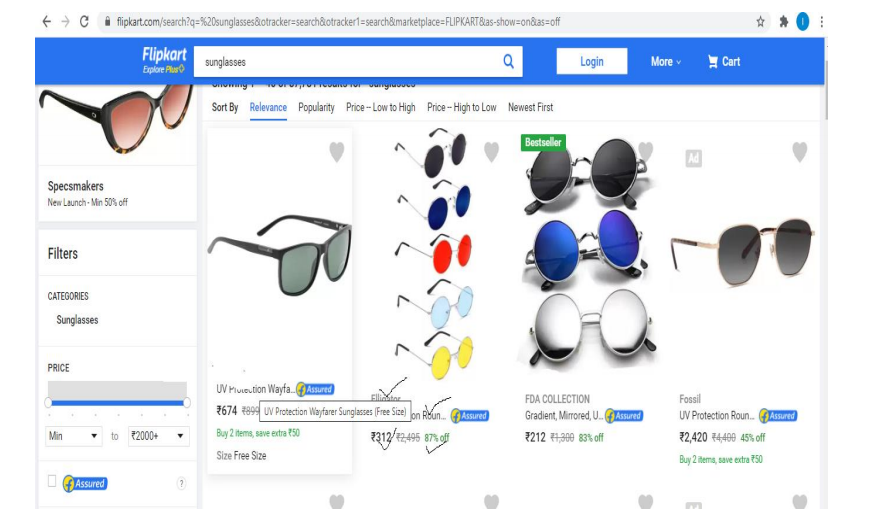

To scrape the data you have to go through following steps:
1. Go to flipkart webpage by url https://www.flipkart.com/
2. Enter “sunglasses” in the search field where “search for products, brands and more” is written and click the search icon
3. after that you will reach to a webpage having a lot of sunglasses. From this page you can scrap the required data as usual.
4. after scraping data from the first page, go to the “Next” Button at the bottom of the page , then click on it
5. Now scrape data from this page as usual
6. repeat this until you get data for 100 sunglasses.

*Note that all of the above steps have to be done by coding only and not manually.*

In [8]:
#Initializing webdriver with chromedriver using with keyword, so that after execution of code driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver:
    #Initializing driver with url https://www.flipkart.com/
    driver.get('https://www.flipkart.com/')
    
    #Closing the login pop up
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
    
    #Initializing and filling the values into required fields
    driver.find_element_by_xpath("//input[@class='_3704LK']").send_keys('sunglasses')
    driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    time.sleep(3)
    
    #Scraping sunglasses data upto 100 records
    sg_containers = []
    brands = []
    product_descriptions = []
    prices = []
    discounts = []
    while(len(brands)<=100):
        sg_containers=driver.find_elements_by_xpath("//div[@class='_2B099V']")
        
        #Scraping required data from sg_containers
        for sg in sg_containers:
            brand = sg.find_element_by_xpath("div[@class='_2WkVRV']").text
            brands.append(brand)
            
            product_description = sg.find_element_by_class_name("IRpwTa").text
            product_descriptions.append(product_description)
            
            price = sg.find_element_by_class_name("_30jeq3").text
            prices.append(price)
            
            discount = sg.find_element_by_class_name("_3Ay6Sb").text
            discounts.append(discount)
                    
        time.sleep(2)
        driver.find_element_by_xpath("//span[contains(text(),'Next')]").click()
        time.sleep(5)
        
    df_sunglasses = pd.DataFrame({
        "Brand": brands,
        "Product Description": product_descriptions,
        "Price": prices,
        "Discount": discounts
    })
    
#Interpreting sunglasses data upto 100
df_sunglasses

,Brand,Product Description,Price,Discount
0,ROYAL SON,UV Protection Retro Square Sunglasses (88),₹599,70% off
1,Villain,Others Retro Square Sunglasses (Free Size),₹599,20% off
2,Fastrack,UV Protection Wayfarer Sunglasses (Free Size),₹758,15% off
3,PIRASO,UV Protection Aviator Sunglasses (Free Size),₹349,78% off
4,PIRASO,UV Protection Aviator Sunglasses (54),₹225,85% off
...,...,...,...,...
115,Aislin,"UV Protection, Gradient Cat-eye Sunglasses (61)",₹500,70% off
116,Redleaf,UV Protection Sports Sunglasses (Free Size),₹339,86% off
117,Silver Kartz,UV Protection Aviator Sunglasses (62),₹255,78% off
118,Fastrack,UV Protection Wayfarer Sunglasses (Free Size),₹576,27% off


#### Q7: Scrape 100 reviews data from flipkart.com for iphone11 phone. You have to go the link: https://www.flipkart.com/apple-iphone-11-black-64-gb-includesearpods-poweradapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace.

When you will open the above link you will reach to the below shown webpage.
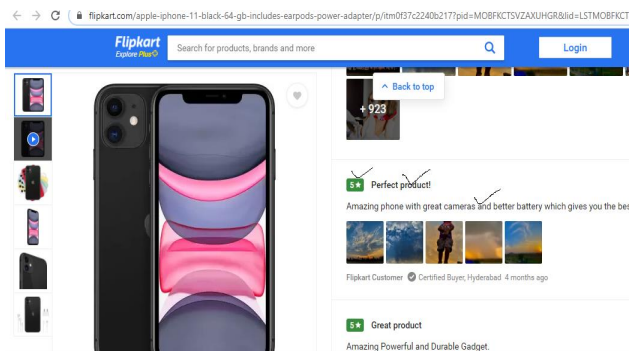
As shown in the above page you have to scrape the tick marked attributes.
These are:
1. Rating
2. Review_summary
3. Full review

You have to scrape this data for first 100 reviews

In [9]:
#Initializing webdriver with chromedriver using with keyword, so that after execution of code driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver:
    #Initializing driver with url https://www.flipkart.com/apple-iphone-11-black-64-gb-includesearpods-poweradapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace
    driver.get('https://www.flipkart.com/apple-iphone-11-black-64-gb-includesearpods-poweradapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace')
    
    #Clicking on All Reviews Link
    driver.find_element_by_xpath("//div[@class='_3UAT2v _16PBlm']/span").click()
    time.sleep(5)
    
    #Scraping review data upto 100 records
    ratings = []
    review_summaries = []
    full_reviews = []
    while(len(ratings)<=100):
        review_containers=driver.find_elements_by_xpath("//div[@class='_27M-vq']")
        #Scraping required data from review_containers
        for review in review_containers:
            rating = review.find_element_by_class_name("_1BLPMq").text
            ratings.append(rating)
            
            review_summary = review.find_element_by_class_name("_2-N8zT").text
            review_summaries.append(review_summary)
            
            full_review = review.find_element_by_class_name("t-ZTKy").text
            full_reviews.append(full_review)            
                    
        time.sleep(2)
        driver.find_element_by_xpath("//span[contains(text(),'Next')]").click()
        time.sleep(5)
        
    df_reviews = pd.DataFrame({
        "Rating": ratings,
        "Review Summary": review_summaries,
        "Full Review": full_reviews
    })
    
#Interpreting sunglasses data upto 100
df_reviews

,Rating,Review Summary,Full Review
0,5,Brilliant,The Best Phone for the Money\n\nThe iPhone 11 ...
1,5,Perfect product!,Amazing phone with great cameras and better ba...
2,5,Worth every penny,Previously I was using one plus 3t it was a gr...
3,5,Great product,Amazing Powerful and Durable Gadget.\n\nI’m am...
4,5,Highly recommended,iphone 11 is a very good phone to buy only if ...
...,...,...,...
105,5,Wonderful,Superfast delivery by Flipkart. Thanks.\n\n1. ...
106,5,Super!,This is my first ever iPhone.\nAnd I truly don...
107,5,Must buy!,Damn this phone is a blast . Upgraded from and...
108,5,Mind-blowing purchase,i was confused between 11 and 11 pro. i was go...


#### Q8: Scrape data for first 100 sneakers you find when you visit flipkart.com and search for “sneakers” in the search field.
You have to scrape 4 attributes of each sneaker :
1. Brand
2. Product Description
3. Price
4. discount %
As shown in the below image, you have to scrape the tick marked attributes.
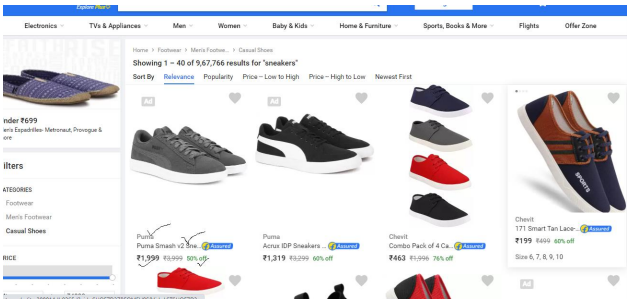
Also note that all the steps required during scraping should be done through code
only and not manually.

In [11]:
#Initializing webdriver with chromedriver using with keyword, so that after execution of code driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver:
    #Initializing driver with url https://www.flipkart.com/
    driver.get('https://www.flipkart.com/')
    
    #Closing the login pop up
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
    
    #Initializing and filling the values into required fields
    driver.find_element_by_xpath("//input[@class='_3704LK']").send_keys('sneakers')
    driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    time.sleep(5)
    
    #Scraping sneaker data upto 100 records
    sneaker_containers = []
    brands = []
    product_descriptions = []
    prices = []
    discounts = []
    while(len(brands)<=100):
        sneaker_containers=driver.find_elements_by_xpath("//div[@class='_2B099V']")
                
        #Scraping required data from sneaker_containers
        for sneaker in sneaker_containers:
            try:
                brand = sneaker.find_element_by_xpath("div[@class='_2WkVRV']").text
                brands.append(brand)

                product_description = sneaker.find_element_by_class_name("IRpwTa").text
                product_descriptions.append(product_description)

                price = sneaker.find_element_by_class_name("_30jeq3").text
                prices.append(price)

                discount = sneaker.find_element_by_class_name("_3Ay6Sb").text
                discounts.append(discount)
            except Exception:
                discounts.append(None)
                brands.append(None)
                product_descriptions.append(None)
                prices.append(None)
                
        time.sleep(7)
        driver.find_element_by_xpath("//span[contains(text(),'Next')]").click()
        time.sleep(10)
        
    df_sneakers = pd.DataFrame({
        "Brand": brands[:100],
        "Product Description": product_descriptions[:100],
        "Price": prices[:100],
        "Discount": discounts[:100]
    })
    
#Interpreting sneakers data upto 100
df_sneakers

,Brand,Product Description,Price,Discount
0,bluemaker,casual for men Sneakers For Men,₹499,50% off
1,BRUTON,Combo Pack Of 4 Casual Sneakers For Men,₹424,89% off
2,Chevit,Perfect & Affordable Combo Pack of 02 Pairs Sn...,₹499,72% off
3,Chevit,Super & Trendy Men's Pack of 02 Pair Shoes for...,₹420,78% off
4,Robbie jones,Casual Sneakers Shoes For Men Sneakers For Men,₹399,60% off
...,...,...,...,...
95,Tryviz,Perfect Black Sneaker Sport Casual Canvas Runn...,₹266,36% off
96,Jack Diamond,Sneakers For Men,₹635,75% off
97,Absolute comfort,Sneakers For Men,₹244,62% off
98,ROCKFIELD,Sneakers For Men,₹379,60% off


#### Q9: Go to the link - https://www.myntra.com/shoes Set Price filter to “Rs. 6649 to Rs. 13099” , Color filter to “Black”, as shown in the below image
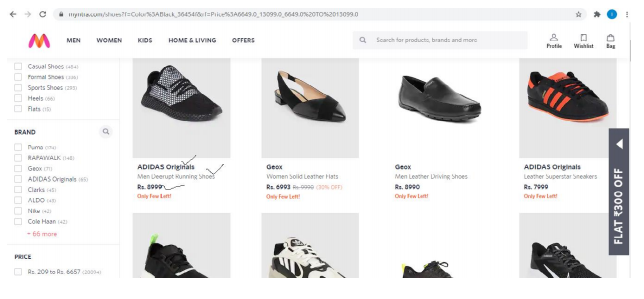
And then scrape First 100 shoes data you get. The data should include “Brand” of the shoes , Short Shoe description, price of the shoe as shown in the below image.
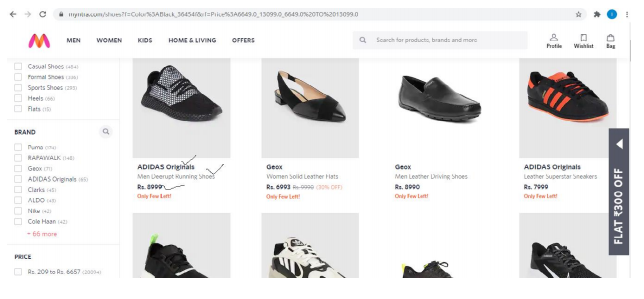
Please note that applying the filter and scraping the data , everything should be done through code only and there should not be any manual step.

In [13]:
#Initializing webdriver with chromedriver using with keyword, so that after execution of code driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver:
    #Initializing driver with url https://www.myntra.com/shoes
    driver.get('https://www.myntra.com/shoes')
    time.sleep(5)
    
    #Initializing and filling the values into required fields
    driver.find_element_by_xpath("//ul[@class='price-list']/li[2]/label").click()
    driver.find_element_by_xpath("//ul/li[@class='colour-listItem'][1]").click()
    time.sleep(3)
    
    #Scraping shoe data upto 100 records
    shoe_containers = []
    brands = []
    product_descriptions = []
    prices = []
    
    while(len(brands)<=100):
        shoe_containers=driver.find_elements_by_xpath("//li[@class='product-base']")
        time.sleep(4)
        
        #Scraping required data from shoe_containers
        for shoe in shoe_containers:
            try:
                brand = shoe.find_element_by_class_name("product-brand").text
                brands.append(brand)

                product_description = shoe.find_element_by_class_name("product-product").text
                product_descriptions.append(product_description)

                price = shoe.find_element_by_class_name("product-discountedPrice").text
                prices.append(price)
            except:
                prices.append(None)
                
        driver.find_element_by_xpath("//a[contains(text(),'Next')]").click()
        time.sleep(5)
        
    df_shoes = pd.DataFrame({
        "Brand": brands[:100],
        "Product Description": product_descriptions[:100],
        "Price": prices[:100]
    })
    
#Interpreting sunglasses data upto 100
df_shoes

,Brand,Product Description,Price
0,Roadster,Men Solid Sneakers,Rs. 1199
1,Red Tape,Men Walking Shoes,Rs. 1224
2,MENGLER,Men Walking Shoes,Rs. 628
3,Puma,Anzarun Cage Running Shoes,Rs. 3149
4,ASICS,Kids Solid Running Shoes,Rs. 758
...,...,...,...
95,Marc Loire,Women Woven Design Ballerinas,None
96,Skechers,Women D'LITES 3.0 Sneakers,None
97,Sir Corbett,Semi-Formal Shoes,None
98,Kenneth Cole,Men Solid Leather Formal Oxfords,None


#### Q10: Go to webpage https://www.amazon.in/ 
- Enter “Laptop” in the search field and then click the search icon.
- Then set CPU Type filter to “Intel Core i7” and “Intel Core i9” as shown in the below image:
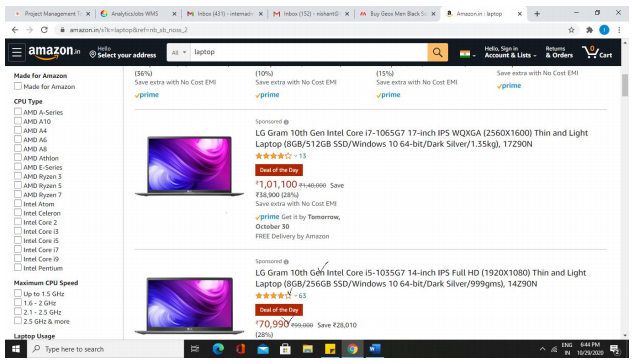
After setting the filters scrape first 10 laptops data. You have to scrape 3 attributes for each laptop:
1. title
2. Ratings
3. Price
As shown in the below image as the tick marked attributes.
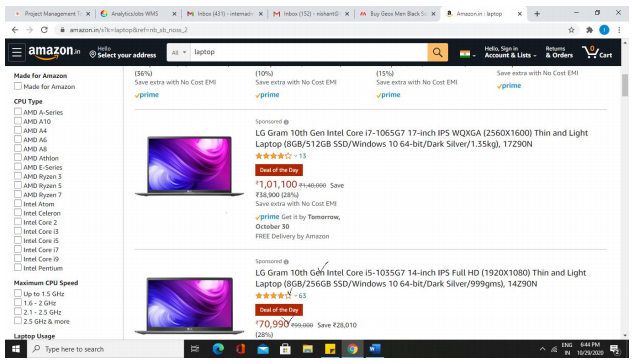

In [23]:
#Initializing webdriver with chromedriver using with keyword, so that after execution of code driver closes automatically
with webdriver.Chrome("chromedriver.exe") as driver:
    #Initializing driver with url https://www.amazon.in/
    driver.get('https://www.amazon.in/')
    time.sleep(5)
    
    #Initializing and filling the values into required fields
    driver.find_element_by_xpath("//input[@id='twotabsearchtextbox']").send_keys('laptop')
    driver.find_element_by_xpath("//input[@id='nav-search-submit-button']").click()
    time.sleep(3)
    
    driver.find_element_by_xpath("//li[@aria-label='Intel Core i7']").click()
    #driver.find_element_by_xpath("//li[@aria-label='Intel Core i9']").click()
    time.sleep(3)
    #Scraping sunglasses data upto 100 records
    product_containers = []
    titles = []
    ratings = []
    prices = []
    
    title = driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a/span")
    for t in title[:10]:
        titles.append(t.text)
        
    rating = driver.find_elements_by_xpath("//span[@class='a-icon-alt']")
    for r in rating[:10]:
        ratings.append(r.text)
        
    price = driver.find_elements_by_xpath("//span[@class='a-price-whole']")
    for p in price[:10]:
        prices.append(p.text)
        
    df_products_details = pd.DataFrame({
        "Title": titles[:10],
        "Rating": ratings[:10],
        "Price": prices[:10]
    })
    
df_products_details

,Title,Rating,Price
0,"Dell Vostro 3400 14"" FHD Anti Glare Display La...",,"56,390"
1,HP 15 11th Gen Intel Core i3 Processor 15.6-in...,,"44,490"
2,Lenovo IdeaPad Slim 3 Intel Celeron N4020 15.6...,,"23,990"
3,HP 15 Entry Level 15.6-inch HD Laptop (AMD 302...,,"22,990"
4,AVITA Essential NE14A2INC433-CR 14-inch Laptop...,,"18,990"
5,Lenovo Ideapad Slim 3 AMD Athlon Silver 3050U ...,,"56,390"
6,Lenovo Ideapad S145 AMD A6-9225 15.6 inch HD T...,,"25,990"
7,ASUS VivoBook 14 (2020) Intel Quad Core Pentiu...,,"24,990"
8,"HP 15 Thin & Light Ryzen 3-3250 Laptop, 4 GB R...",,"24,990"
9,HP Chromebook 14a-na0003TU 14-inch Thin & Ligh...,,"31,999"
